In [1]:
%matplotlib inline
import sygma
import numpy as np
import matplotlib.pyplot as plt
mpl.use('Agg')
mpl.rcParams['hatch.linewidth'] = 8
from matplotlib import rc, cm
viridis = cm.get_cmap('viridis')
magma   = cm.get_cmap('magma')
plasma  = cm.get_cmap('plasma')

fsize = 17
rc('text', usetex=False)
rc('font', size=fsize)#, ftype=42)
line_width = 3.5
point_size = 30



/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [52]:
s0   = sygma.sygma(mgal=1.0, iniZ=0.0001)
s1   = sygma.sygma(mgal=1.0, iniZ=0.001)
s2   = sygma.sygma(mgal=1.0, iniZ=0.006)
s3   = sygma.sygma(mgal=1.0, iniZ=0.01)
s4   = sygma.sygma(mgal=1.0, iniZ=0.02)
s4   = sygma.sygma(mgal=1.0, iniZ=0.03)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.36s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.36s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.36s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.37s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.37s


UnboundLocalError: local variable 'iniabu' referenced before assignment

In [14]:
def compute_y(data, field):
    x = data.history.age
    x = np.array(x[1:])/1.0E9
    yields  = data.history.ism_elem_yield
    agb     = data.history.ism_elem_yield_agb
    massive = data.history.ism_elem_yield_massive

    idx=data.history.elements.index(field)
    y = []
    yagb = []
    ymassive = []
    for k in range(len(yields)):
        y.append(yields[k][idx])
        yagb.append(agb[k][idx])
        ymassive.append(massive[k][idx])

    yplot = np.array(yagb[1:]) / np.array(y[1:])
    
    return x, yplot

def compute_agb_fraction(data, field, time):
    
    t, y = compute_y(data, field) # grabs agb fraction vs. time

    return np.interp(time, t, y)

In [45]:
all_elements  = s0.history.elements[2:55]
plot_elements = []
for f in all_elements:
    if (compute_agb_fraction(s3, f, 10.0) > 0.5):
        plot_elements.append(f)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide


In [46]:
print plot_elements, np.size(plot_elements)

['Li', 'B', 'C', 'N', 'F', 'Pb', 'Rb', 'Y', 'Zr', 'Nb', 'Mo', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba'] 24


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide


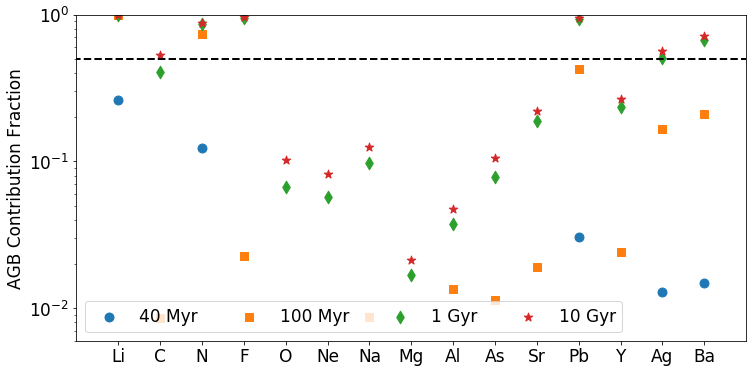

In [71]:
fields = ['C','N','O','Na','Mg','Si','S','Ca','Mn','Fe','Ni','As','Sr','Y','Ba']

fields = ['Li','C','N','F','O','Ne','Na','Mg','Al','As','Sr','Pb','Y','Ag','Ba']

DF = s1
outname = 'Half_AGB_Fraction_elements_s1.png'


all_times = [40, 100, 1000, 10000]
t_label   = {40 : '40 Myr',100:'100 Myr',1000:'1 Gyr',10000:'10 Gyr'}
colors    = {40 : "C0", 100 : "C1", 1000 : "C2", 10000 : "C3"}
markers =  {40 : 'o', 100 : 's' , 1000 : 'd' , 10000 : '*'}

fig, ax = plt.subplots()
fig.set_size_inches(12,6)

index = np.arange(np.size(fields))
ax.set_xticks(index)
ax.set_xticklabels(fields)

for time in all_times:
    yvals = np.zeros(np.size(fields))
    
    i = 0
    for f in fields:
        yvals[i] = compute_agb_fraction(DF, f, time / 1.0E3)
        i = i + 1
        
    ax.scatter(index, yvals, color = colors[time], marker = markers[time],
               s = 80, label = t_label[time])
    
x = np.arange(-5,np.size(fields)+2)
ax.plot(x,[0.5]*np.size(x), ls = '--', color = 'black', lw = 2)

ax.set_xlim(-1,np.size(fields))
ax.legend(loc='lower left', ncol = 4)
ax.semilogy()
ax.set_ylim(0.006, 1.0)
ax.set_ylabel('AGB Contribution Fraction')
fig.savefig(outname)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide


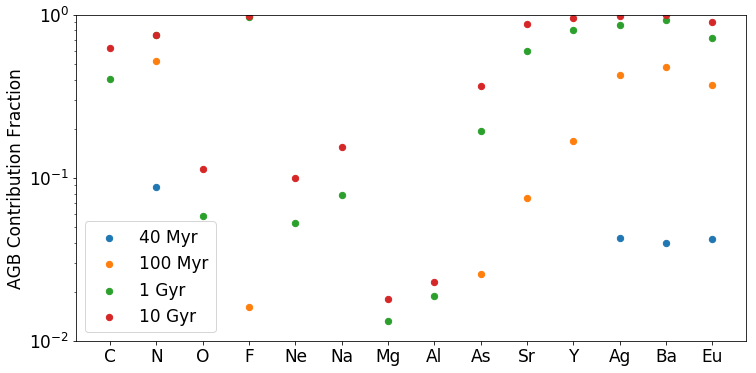

In [25]:
fields = ['C','N','O','Na','Mg','Si','S','Ca','Mn','Fe','Ni','As','Sr','Y','Ba']

fields = ['C','N','O','F','Ne','Na','Mg','Al','As','Sr','Y','Ag','Ba','Eu']

all_times = [40, 100, 1000, 10000]
t_label   = {40 : '40 Myr',100:'100 Myr',1000:'1 Gyr',10000:'10 Gyr'}
colors    = {40 : "C0", 100 : "C1", 1000 : "C2", 10000 : "C3"}

markers = {}
for k in colors.keys():
    markers[k] = 'o'


fig, ax = plt.subplots()
fig.set_size_inches(12,6)

index = np.arange(np.size(fields))
ax.set_xticks(index)
ax.set_xticklabels(fields)

for time in all_times:
    yvals = np.zeros(np.size(fields))
    
    i = 0
    for f in fields:
        yvals[i] = compute_agb_fraction(s0, f, time / 1.0E3)
        i = i + 1
        
    ax.scatter(index, yvals, color = colors[time], marker = markers[time],
               s = 40, label = t_label[time])
ax.legend(loc='best')
ax.semilogy()
ax.set_ylim(0.01, 1.0)
ax.set_ylabel('AGB Contribution Fraction')
fig.savefig('AGB_Fraction_elements.png')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide


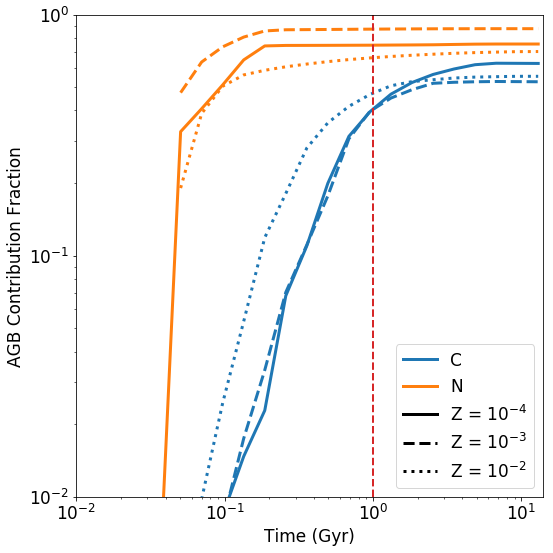

In [41]:

        
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

x,y = compute_y(s0, 'C')
ax.plot(x, y, lw = 3, color = 'C0', ls = '-', label = 'C')
x,y = compute_y(s1, 'C')
ax.plot(x, y, lw = 3, color = 'C0', ls = '--')
x,y = compute_y(s3, 'C')
ax.plot(x, y, lw = 3, color = 'C0', ls = ':')

x,y = compute_y(s0, 'N')
ax.plot(x, y, lw = 3, color = 'C1', ls = '-', label = 'N')
x,y = compute_y(s1, 'N')
ax.plot(x, y, lw = 3, color = 'C1', ls = '--')
x,y = compute_y(s3, 'N')
ax.plot(x, y, lw = 3, color = 'C1', ls = ':')

#x,y = compute_y(s0, 'Ba')
#ax.plot(x, y, lw = 3, color = 'C2', ls = '-', label = 'Sr')
#x,y = compute_y(s1, 'Ba')
#ax.plot(x, y, lw = 3, color = 'C2', ls = '--')
#x,y = compute_y(s3, 'Ba')
#ax.plot(x, y, lw = 3, color = 'C2', ls = ':')


ax.semilogx()
ax.semilogy()
ax.set_ylim(1.0E-2, 1.0)

ax.plot([1.0,1.0],ax.get_ylim(),lw = 2.0, ls = '--', color ='C3')

ax.plot([0.0001,0.0001],ax.get_ylim(),lw = 3.0, ls = '-', color ='black', label = r'Z = 10$^{-4}$')
ax.plot([0.0001,0.0001],ax.get_ylim(),lw = 3.0, ls = '--', color ='black',  label = r'Z = 10$^{-3}$')
ax.plot([0.0001,0.0001],ax.get_ylim(),lw = 3.0, ls = ':', color ='black',  label = r'Z = 10$^{-2}$')
ax.set_xlim(0.01, 14.0)


ax.set_ylabel(r'AGB Contribution Fraction')
ax.set_xlabel(r'Time (Gyr)')
ax.legend(loc='best')
plt.tight_layout()
fig.savefig('C_N_evolution.png')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in divide


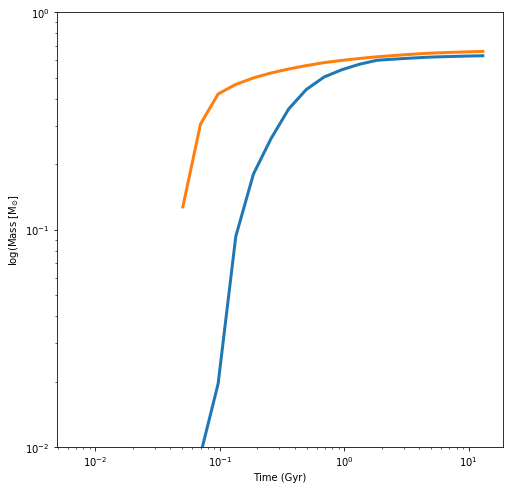

In [23]:
data = s4

x = data.history.age
x = np.array(x[1:])/1.0E9
yields  = data.history.ism_elem_yield
agb     = data.history.ism_elem_yield_agb
massive = data.history.ism_elem_yield_massive


fig, ax = plt.subplots()
fig.set_size_inches(8,8)

idx=data.history.elements.index('C')
y = []
yagb = []
ymassive = []
for k in range(len(yields)):
    y.append(yields[k][idx])
    yagb.append(agb[k][idx])
    ymassive.append(massive[k][idx])

yplot = np.array(yagb[1:]) / np.array(y[1:])

ax.plot(x, yplot, lw = 3, color = 'C0', ls = '-', label = 'All')
#ax.plot(x, yagb[1:], lw = 3, color = 'C0', ls = ':', label = 'AGB')
#ax.plot(x, ymassive[1:], lw = 3, color = 'C0', ls = '--', label = 'Massive')

idx=data.history.elements.index('N')
y = []
yagb = []
ymassive = []
for k in range(len(yields)):
    y.append(yields[k][idx])
    yagb.append(agb[k][idx])
    ymassive.append(massive[k][idx])
yplot = np.array(yagb[1:]) / np.array(y[1:])

ax.plot(x, yplot, lw = 3, color = 'C1', ls = '-', label = 'All')

ax.semilogx()
ax.semilogy()
ax.set_ylim(1.0E-2, 1.0)
ax.set_ylabel(r'log(Mass [M$_{\odot}$]')
ax.set_xlabel(r'Time (Gyr)')